         Date      Open      High       Low     Close  Adj Close    Volume  \
0  1996-01-01  5.550000  5.600000  5.533333  5.583333   3.303552    985500   
1  1996-01-02  5.466666  5.566666  5.288888  5.372222   3.178643   7470000   
2  1996-01-03  5.133333  5.254444  5.101111  5.200000   3.076741  15160500   
3  1996-01-04  5.200000  5.332222  5.144444  5.297777   3.134595  12397500   
4  1996-01-05  5.297777  5.277777  5.188888  5.202222   3.078056   5008500   

     Population  
0  98,32,81,218  
1  98,32,81,219  
2  98,32,81,220  
3  98,32,81,221  
4  98,32,81,222  
DataFrame cointains stock price between 1996-01-01 00:00:00 2023-07-10 00:00:00
Total days=10052 days 00:00:00days



metric           train                test        
r2_score  0.8508274107780848	0.8506161776551046
mse       1789.75640807078	1703.9969710195057



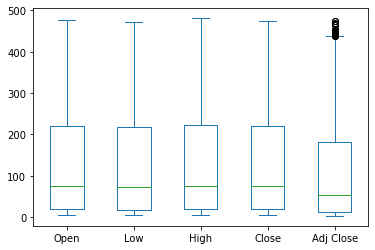

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import chart_studio.ployly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

data = pd.read_csv('/home/saran.p@censanext.local/Downloads/ITC - Sheet1.csv') 
print(data.head())

data['Date']=pd.to_datetime(data['Date'])
print(f'DataFrame cointains stock price between {data.Date.min()} {data.Date.max()}')
print(f'Total days={data.Date.max()-data.Date.min()}days')

data[['Open','Low','High','Close','Adj Close','Population']].plot(kind='box')
layout=go.Layout(
    title='stock price of ITC',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data_d=[{'x':data[['Date','Open','Low','High','Close','Adj Close','Population']],'y':data['Close']}]
plot=go.Figure(data=data_d, layout=layout)
iplot(plot)
x=np.array(data.index).reshape(-1,1)
y=data['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)
scaler=StandardScaler().fit(x_train)
model = LinearRegression()
model.fit(x_train,y_train)
trace0=go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='actual'
)
trace1=go.Scatter(
    x=x_train.T[0],
    y=model.predict(x_train).T,
    mode='lines',
    name='prediction'
)
data_d=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=data_d,layout=layout)
iplot(plot2)
scores=f'''
{'metric'.ljust(10)}{'train'.center(20)}{'test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,model.predict(x_train))}\t{r2_score(y_test,model.predict(x_test))}
{'mse'.ljust(10)}{mse(y_train,model.predict(x_train))}\t{mse(y_test,model.predict(x_test))}
'''
print(scores)
